In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# https://scratch.mit.edu/projects/749457284/
의 스크래치 프로젝트에서 음악을 만들어 오세요

In [2]:
my_file = open("s1.txt", "r")
text_from_my_file = my_file.read()
data_into_list = text_from_my_file.split("\n")
print(data_into_list)
my_file.close()

['55', '55', '63', '55', '55', '63', '63', '63', '60']


In [3]:
#파일 읽어와서 s1 리스트에 넣기 

s1_from_file =[]
# Using enumerate() 
for i, notenumber in enumerate(data_into_list):
    print (i, ",",int(notenumber))
    s1_from_file.append([i,int(notenumber)])

0 , 55
1 , 55
2 , 63
3 , 55
4 , 55
5 , 63
6 , 63
7 , 63
8 , 60


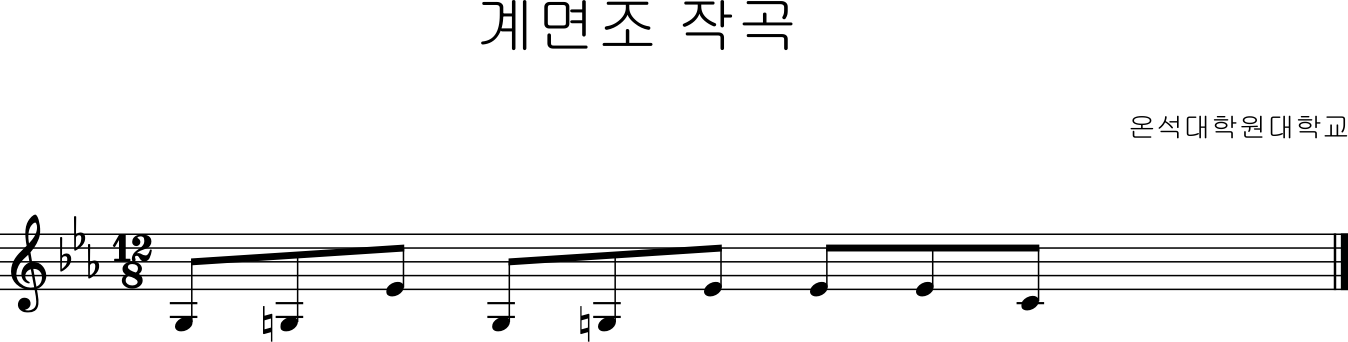

In [4]:
from music21 import *
import random

s1 = stream.Stream();
s1.clear()
s1.insert(0, metadata.Metadata())
s1.metadata.title = '계면조 작곡 '
s1.metadata.composer = '온석대학원대학교'
s1.insert(0, meter.TimeSignature('12/8'))
s1.keySignature= key.KeySignature(-3)

#파일 읽어와서 s1 리스트에 넣기 

# Using enumerate() 
for i, notenumber in enumerate(data_into_list):
    n1 = note.Note(int(notenumber))
    n1.quarterLength=0.5
    s1.append(n1)
    
s1.show()


In [5]:
s1.show('midi')

In [6]:
#파일 읽어와서 s1 리스트에 넣기 

s1_from_file =[]
# Using enumerate() 
for i, notenumber in enumerate(data_into_list):
    print (i, ",",int(notenumber))
    s1_from_file.append([i,int(notenumber)])

0 , 55
1 , 55
2 , 63
3 , 55
4 , 55
5 , 63
6 , 63
7 , 63
8 , 60


In [7]:
next_note_beat=len(s1_from_file)

In [8]:
next_note_beat

9

In [9]:
X = np.array(s1_from_file)[:,0].reshape(-1,1)
y = np.array(s1_from_file)[:,1].reshape(-1,1)

#이제 다음노트의 값을 예측

to_predict_x= [next_note_beat]
to_predict_x= np.array(to_predict_x).reshape(-1,1)
regsr=LinearRegression()
regsr.fit(X,y)
predicted_y= regsr.predict(to_predict_x)
m= regsr.coef_
c= regsr.intercept_

print("다음노트는? y:\n",predicted_y)
print("slope (m): ",m)
print("y-intercept (c): ",c)

다음노트는? y:
 [[63.44444444]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]


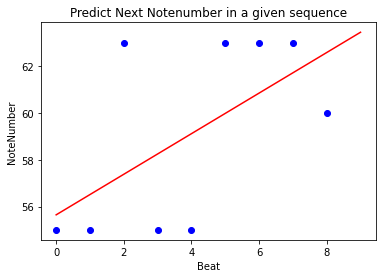

In [10]:
#그래프 그리기
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Predict Next Notenumber in a given sequence')  
plt.xlabel('Beat')  
plt.ylabel('NoteNumber') 
plt.scatter(X,y,color="blue")
new_y=[ m*i+c for i in np.append(X,to_predict_x)]
new_y=np.array(new_y).reshape(-1,1)
plt.plot(np.append(X,to_predict_x),new_y,color="red")
plt.show()

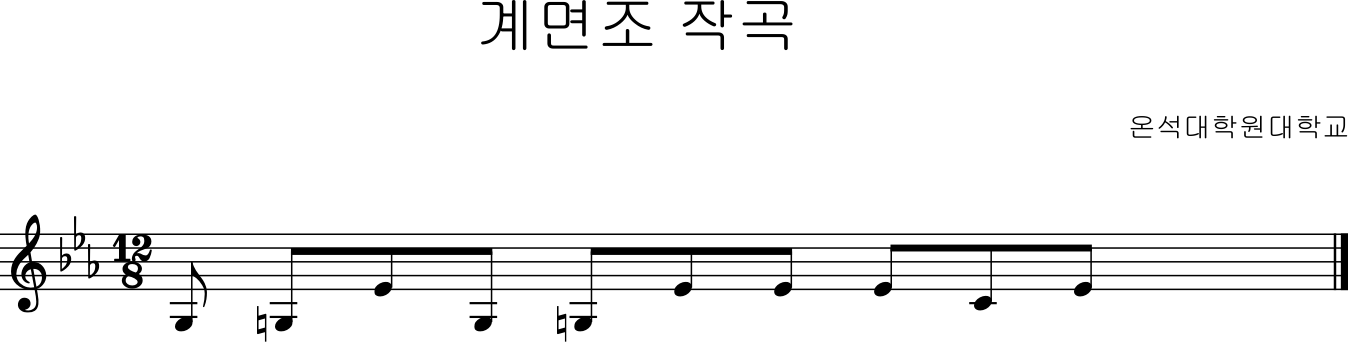

In [11]:
#예측한 다음노트를 s1 뮤직 스트림에 추가

n1 = note.Note(int(predicted_y))
n1.quarterLength=0.5
s1.append(n1)
s1.show()

In [12]:
s1.show('midi')

In [13]:
#다음시퀀스에 마지막 음으로 부터 추가된 음악추가

In [14]:
s1_from_file.append([next_note_beat,int(predicted_y)])

In [15]:
s1_from_file

[[0, 55],
 [1, 55],
 [2, 63],
 [3, 55],
 [4, 55],
 [5, 63],
 [6, 63],
 [7, 63],
 [8, 60],
 [9, 63]]

In [16]:
for i in range(100):
    next_note_beat=len(s1_from_file)
    print(next_note_beat)
    #이제 다음노트의 값을 예측
    to_predict_x= [next_note_beat]
    to_predict_x= np.array(to_predict_x).reshape(-1,1)
    regsr=LinearRegression()
    regsr.fit(X,y)
    predicted_y= regsr.predict(to_predict_x)
    m= regsr.coef_
    c= regsr.intercept_
    print("다음노트는? y:\n",predicted_y)
    print("slope (m): ",m)
    print("y-intercept (c): ",c)
    s1_from_file.append([next_note_beat,int(predicted_y)])
    s1_from_file
    
    n1 = note.Note(int(predicted_y))
    n1.quarterLength=0.5
    s1.append(n1)

10
다음노트는? y:
 [[64.31111111]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
11
다음노트는? y:
 [[65.17777778]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
12
다음노트는? y:
 [[66.04444444]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
13
다음노트는? y:
 [[66.91111111]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
14
다음노트는? y:
 [[67.77777778]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
15
다음노트는? y:
 [[68.64444444]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
16
다음노트는? y:
 [[69.51111111]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
17
다음노트는? y:
 [[70.37777778]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
18
다음노트는? y:
 [[71.24444444]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
19
다음노트는? y:
 [[72.11111111]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
20
다음노트는? y:
 [[72.97777778]]
slope (m):  [[0.86666667]]
y-intercept (c):  [55.64444444]
21
다음노트는? y:
 [[73.84

In [17]:
s1_from_file

[[0, 55],
 [1, 55],
 [2, 63],
 [3, 55],
 [4, 55],
 [5, 63],
 [6, 63],
 [7, 63],
 [8, 60],
 [9, 63],
 [10, 64],
 [11, 65],
 [12, 66],
 [13, 66],
 [14, 67],
 [15, 68],
 [16, 69],
 [17, 70],
 [18, 71],
 [19, 72],
 [20, 72],
 [21, 73],
 [22, 74],
 [23, 75],
 [24, 76],
 [25, 77],
 [26, 78],
 [27, 79],
 [28, 79],
 [29, 80],
 [30, 81],
 [31, 82],
 [32, 83],
 [33, 84],
 [34, 85],
 [35, 85],
 [36, 86],
 [37, 87],
 [38, 88],
 [39, 89],
 [40, 90],
 [41, 91],
 [42, 92],
 [43, 92],
 [44, 93],
 [45, 94],
 [46, 95],
 [47, 96],
 [48, 97],
 [49, 98],
 [50, 98],
 [51, 99],
 [52, 100],
 [53, 101],
 [54, 102],
 [55, 103],
 [56, 104],
 [57, 105],
 [58, 105],
 [59, 106],
 [60, 107],
 [61, 108],
 [62, 109],
 [63, 110],
 [64, 111],
 [65, 111],
 [66, 112],
 [67, 113],
 [68, 114],
 [69, 115],
 [70, 116],
 [71, 117],
 [72, 118],
 [73, 118],
 [74, 119],
 [75, 120],
 [76, 121],
 [77, 122],
 [78, 123],
 [79, 124],
 [80, 124],
 [81, 125],
 [82, 126],
 [83, 127],
 [84, 128],
 [85, 129],
 [86, 130],
 [87, 131],
 [88, 

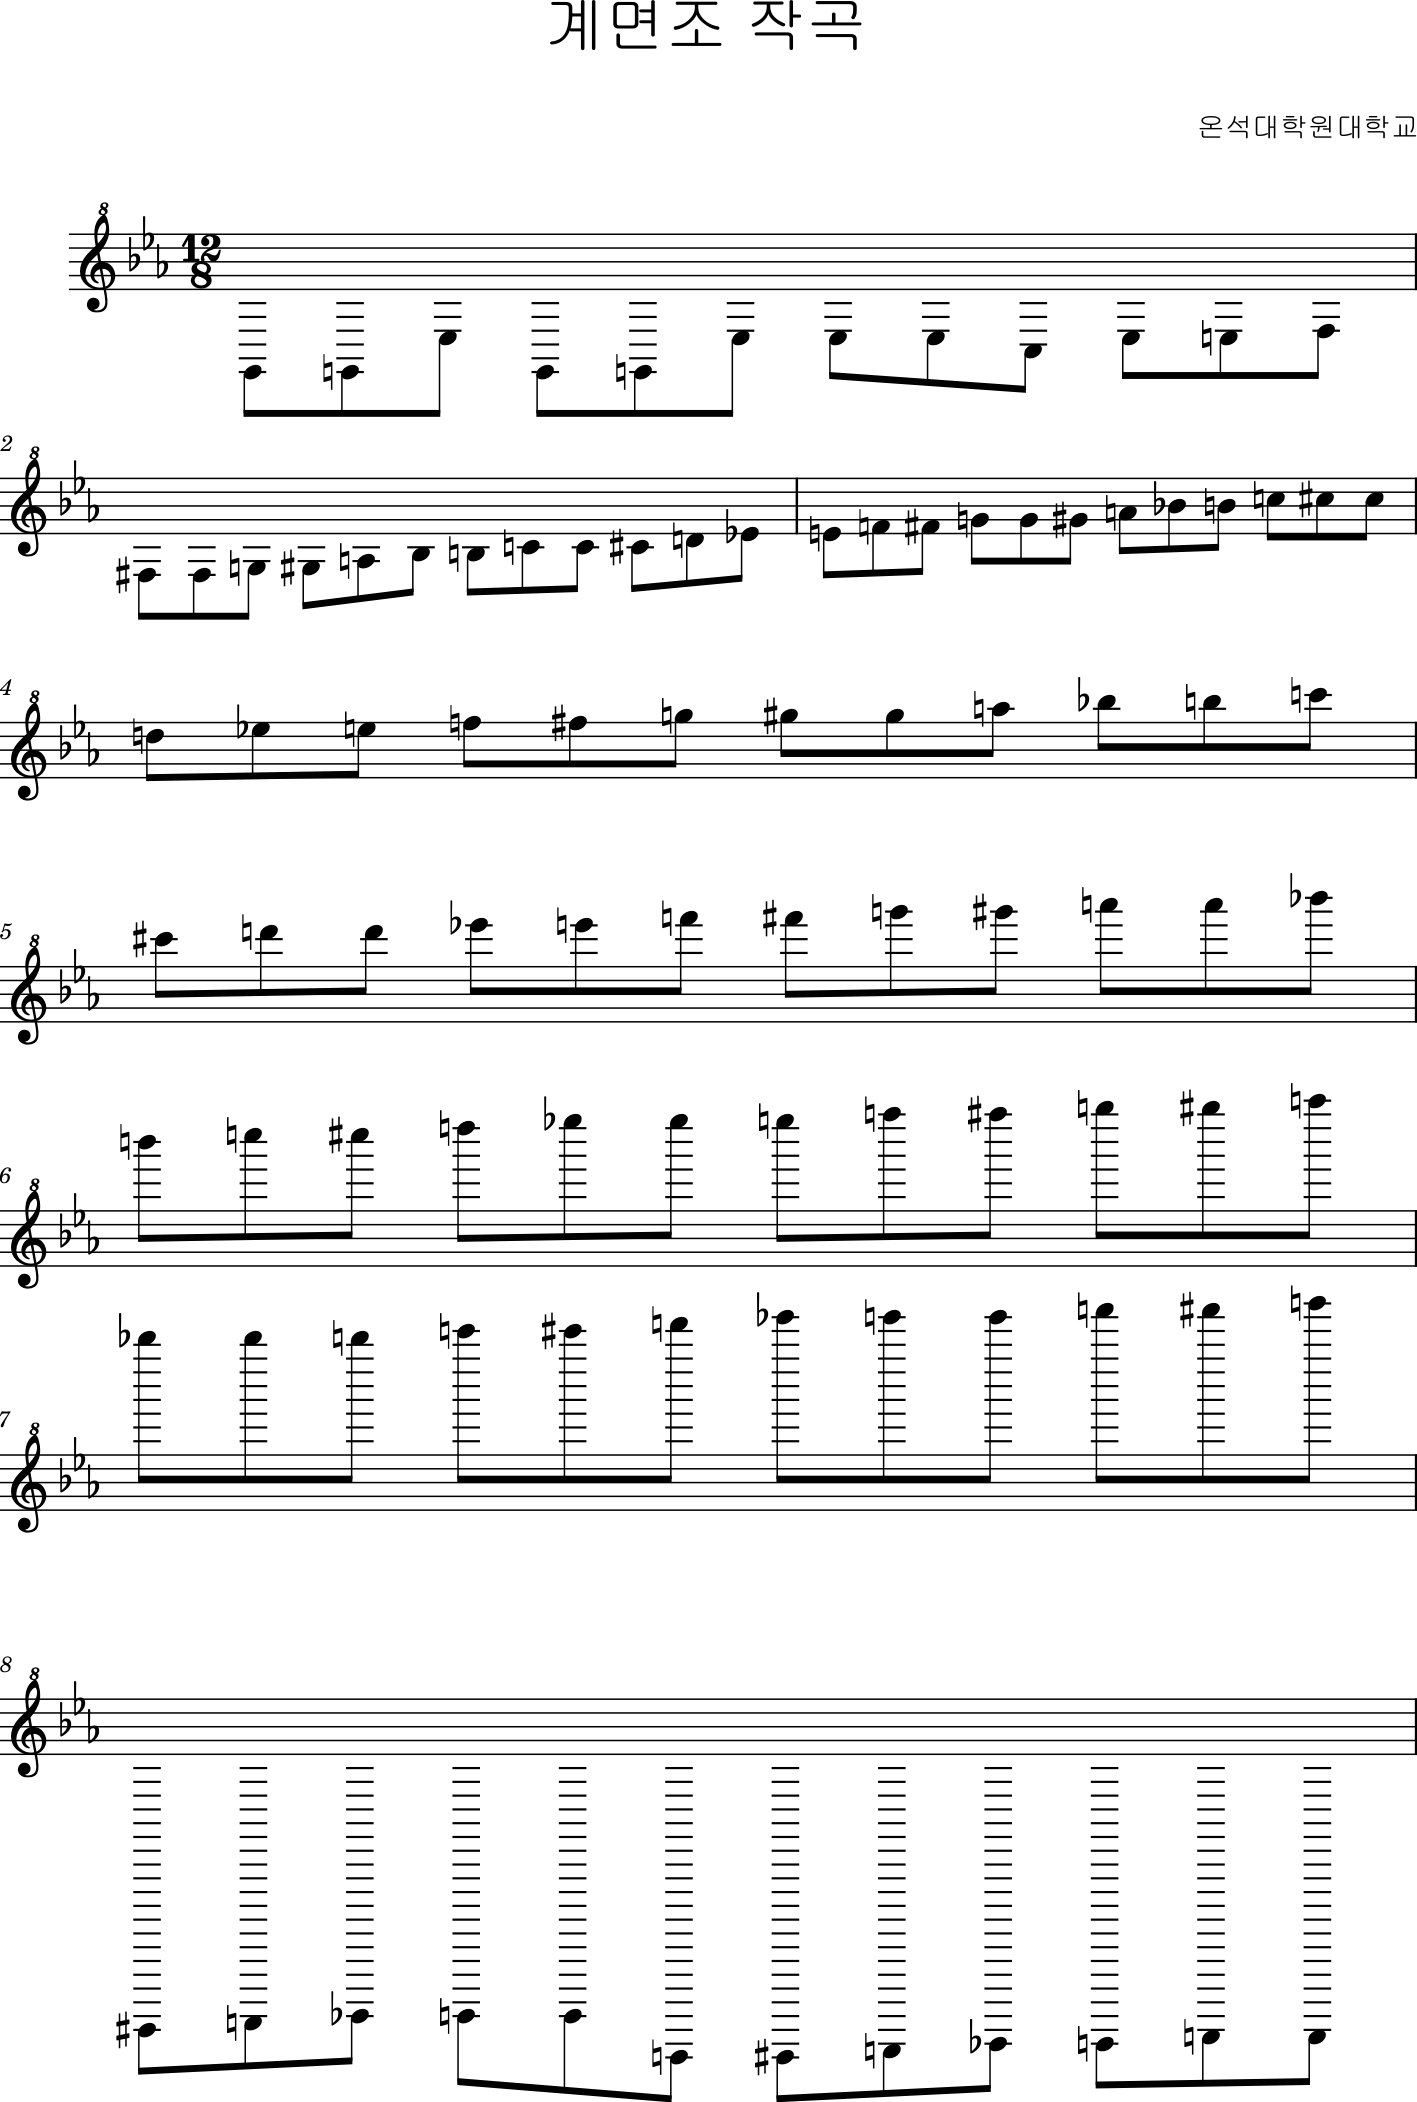

In [18]:
s1.show()

In [20]:
s1.show('midi')